# Pre processing data

In [1]:
# getting the required libraries
import pandas as pd

In [2]:
# getting both the dataframes for ppi and non-ppi
ppi = pd.read_csv('/kaggle/input/ppi-dataset/positive_protein_sequences.csv')
non_ppi = pd.read_csv('/kaggle/input/ppi-dataset/negative_protein_sequences.csv')

In [3]:
# merging the 2 df
ppi["PPI"]=1
non_ppi["PPI"]=0
df = pd.concat([ppi, non_ppi], axis=0)

In [4]:
df

,protein_sequences_1,protein_sequences_2,PPI
0,MESSKKMDSPGALQTNPPLKLHTDRSAGTPVFVPEQGGYKEKFVKT...,MARPHPWWLCVLGTLVGLSATPAPKSCPERHYWAQGKLCCQMCEPG...,1
1,MVMSSYMVNSKYVDPKFPPCEEYLQGGYLGEQGADYYGGGAQGADF...,MAENVVEPGPPSAKRPKLSSPALSASASDGTDFGSLFDLEHDLPDE...,1
2,MNRHLWKSQLCEMVQPSGGPAADQDVLGEESPLGKPAMLHLPSEQG...,MEGGRRARVVIESKRNFFLGAFPTPFPAEHVELGRLGDSETAMVPG...,1
3,MAPPSTREPRVLSATSATKSDGEMVLPGFPDADSFVKFALGSVVAV...,MLFYSFFKSLVGKDVVVELKNDLSICGTLHSVDQYLNIKLTDISVT...,1
4,MQSGPRPPLPAPGLALALTLTMLARLASAASFFGENHLEVPVATAL...,MQTIKCVVVGDGAVGKTCLLISYTTNKFPSEYVPTVFDNYAVTVMI...,1
...,...,...,...
36475,MERFVVTAPPARNRSKTALYVTPLDRVTEFGGELHEDGGKLFCTSC...,MLGMIKNSLFGSVETWPWQVLSKGDKEEVAYEERACEGGKFATVEV...,0
36476,MAAGKSGGSAGEITFLEALARSESKRDGGFKNNWSFDHEEESEGDT...,MSSASGLRRGHPAGGEENMTETDAFYKREMFDPAEKYKMDHRRRGI...,0
36477,MQAQQYQQQRRKFAAAFLAFIFILAAVDTAEAGKKEKPEKKVKKSD...,MPRGRKSRRRRNARAAEENRNNRKIQASEASETPMAASVVASTPED...,0
36478,MNQPQRMAPVGTDKELSDLLDFSMMFPLPVTNGKGRPASLAGAQFG...,MVPALRYLVGACGRARGRFAGGSPGACGFASGRPRPLCGGSRSAST...,0


In [5]:
df.reset_index(drop=True,inplace=True)

In [6]:
#list of amino acids
amino_acids = ["A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", 
    "Q", "R", "S", "T", "V", "W", "Y"]

# Define a set of all amino acids
all_amino_acids = set(amino_acids)

def count_non_standard(sequence):
    # Convert sequence to a set of amino acids
    sequence_set = set(sequence)
    # Find amino acids not in the standard list 
    # by removing the amino acids set from the seq set 
    non_standard_amino_acids = sequence_set - all_amino_acids
    # Check if there are any non-standard amino acids
    if len(non_standard_amino_acids) > 0:
        print(non_standard_amino_acids)
    return len(non_standard_amino_acids) > 0

# Count non-standard sequences1
count_non_standard1 = sum(count_non_standard(seq) for seq in df['protein_sequences_1'])

print("Number of sequences with non-standard amino acids:", count_non_standard1)

# Count non-standard sequences2 
count_non_standard2 = sum(count_non_standard(seq) for seq in df['protein_sequences_2'])

print("Number of sequences with non-standard amino acids:", count_non_standard2)

{'U'}
{'U'}
{'U'}
Number of sequences with non-standard amino acids: 3
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}
{'U'}

# Adding the features that can be used by the machine learning algorithm

- length of each sequence
- molecular weight
- amino acid composition
- aromaticity
- secondary structure percentage (Helix, turn. sheets)
- Isolelectric point

In [7]:
# downloading the required libraries
!pip install Bio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.0 MB/s eta 0:00:00


In [8]:
# Adding the protein length
df["protein1_length"] = df["protein_sequences_1"].str.len()
df["protein2_length"] = df["protein_sequences_2"].str.len()

In [9]:
df

,protein_sequences_1,protein_sequences_2,PPI,protein1_length,protein2_length
0,MESSKKMDSPGALQTNPPLKLHTDRSAGTPVFVPEQGGYKEKFVKT...,MARPHPWWLCVLGTLVGLSATPAPKSCPERHYWAQGKLCCQMCEPG...,1,568,260
1,MVMSSYMVNSKYVDPKFPPCEEYLQGGYLGEQGADYYGGGAQGADF...,MAENVVEPGPPSAKRPKLSSPALSASASDGTDFGSLFDLEHDLPDE...,1,255,2414
2,MNRHLWKSQLCEMVQPSGGPAADQDVLGEESPLGKPAMLHLPSEQG...,MEGGRRARVVIESKRNFFLGAFPTPFPAEHVELGRLGDSETAMVPG...,1,419,538
3,MAPPSTREPRVLSATSATKSDGEMVLPGFPDADSFVKFALGSVVAV...,MLFYSFFKSLVGKDVVVELKNDLSICGTLHSVDQYLNIKLTDISVT...,1,885,95
4,MQSGPRPPLPAPGLALALTLTMLARLASAASFFGENHLEVPVATAL...,MQTIKCVVVGDGAVGKTCLLISYTTNKFPSEYVPTVFDNYAVTVMI...,1,2322,191
...,...,...,...,...,...
73105,MERFVVTAPPARNRSKTALYVTPLDRVTEFGGELHEDGGKLFCTSC...,MLGMIKNSLFGSVETWPWQVLSKGDKEEVAYEERACEGGKFATVEV...,0,167,189
73106,MAAGKSGGSAGEITFLEALARSESKRDGGFKNNWSFDHEEESEGDT...,MSSASGLRRGHPAGGEENMTETDAFYKREMFDPAEKYKMDHRRRGI...,0,1112,293
73107,MQAQQYQQQRRKFAAAFLAFIFILAAVDTAEAGKKEKPEKKVKKSD...,MPRGRKSRRRRNARAAEENRNNRKIQASEASETPMAASVVASTPED...,0,168,219
73108,MNQPQRMAPVGTDKELSDLLDFSMMFPLPVTNGKGRPASLAGAQFG...,MVPALRYLVGACGRARGRFAGGSPGACGFASGRPRPLCGGSRSAST...,0,654,463


In [10]:
# testing which properties can be extracted from our dataset
# starting with amino acid composition

protein_seq = "BXZJUO"

from Bio.SeqUtils.ProtParam import ProteinAnalysis

X = ProteinAnalysis(protein_seq)
print(X.count_amino_acids())

# since biopython doesn't return the count for extra sequences we can make one a function for our use

{'A': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'K': 0, 'L': 0, 'M': 0, 'N': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'V': 0, 'W': 0, 'Y': 0}


In [11]:
# defining a function to get amino acid composition
# since the data contains the amino acid "U" biopython gives error
def aa_comp(seq):
    amino_acid_composition = {}
    
    # the protein list and info is copied from https://github.com/biopython/biopython/blob/master/Bio/Data/IUPACData.py
    amino_acids = list("ACDEFGHIKLMNPQRSTVWYU")
    
    # all_amino_acids = list("ACDEFGHIKLMNPQRSTVWYBXZJUO")
    # not taking BXZJO as for this case they are not necessary
    #   B = "Asx";  aspartic acid or asparagine (D or N)
    #   X = "Xxx";  unknown or 'other' amino acid
    #   Z = "Glx";  glutamic acid or glutamine (E or Q)
    #   http://www.chem.qmul.ac.uk/iupac/AminoAcid/A2021.html#AA212
    #
    #   J = "Xle";  leucine or isoleucine (L or I, used in NMR)
    #   Mentioned in http://www.chem.qmul.ac.uk/iubmb/newsletter/1999/item3.html
    #   Also the International Nucleotide Sequence Database Collaboration (INSDC)
    #   (i.e. GenBank, EMBL, DDBJ) adopted this in 2006
    #   http://www.ddbj.nig.ac.jp/insdc/icm2006-e.html
    #
    #   Xle (J); Leucine or Isoleucine
    #   The residue abbreviations, Xle (the three-letter abbreviation) and J
    #   (the one-letter abbreviation) are reserved for the case that cannot
    #   experimentally distinguish leucine from isoleucine.
    #
    #   U = "Sec";  selenocysteine
    #   http://www.chem.qmul.ac.uk/iubmb/newsletter/1999/item3.html
    #
    #   O = "Pyl";  pyrrolysine
    #   http://www.chem.qmul.ac.uk/iubmb/newsletter/2009.html#item35
    
    #iterating through each amino acid one by one
    for aa in amino_acids:
        amino_acid_composition[aa] = round(float(seq.count(aa)) / len(seq)*100, 3)
        
    return amino_acid_composition

In [12]:
print(aa_comp(protein_seq))

{'A': 0.0, 'C': 0.0, 'D': 0.0, 'E': 0.0, 'F': 0.0, 'G': 0.0, 'H': 0.0, 'I': 0.0, 'K': 0.0, 'L': 0.0, 'M': 0.0, 'N': 0.0, 'P': 0.0, 'Q': 0.0, 'R': 0.0, 'S': 0.0, 'T': 0.0, 'V': 0.0, 'W': 0.0, 'Y': 0.0, 'U': 16.667}


In [13]:
# Apply the aa_comp function to each protein1 seq
amino_acid_df = df['protein_sequences_1'].apply(aa_comp)

# Convert the series of dictionaries into a DataFrame and add prefix to columns
amino_acid_df = amino_acid_df.apply(pd.Series).add_prefix('p1_')

# Concatenate the new amino acid composition DataFrame with the original DataFrame
df = pd.concat([df, amino_acid_df], axis=1)


In [14]:
df

,protein_sequences_1,protein_sequences_2,PPI,protein1_length,protein2_length,p1_A,p1_C,p1_D,p1_E,p1_F,...,p1_N,p1_P,p1_Q,p1_R,p1_S,p1_T,p1_V,p1_W,p1_Y,p1_U
0,MESSKKMDSPGALQTNPPLKLHTDRSAGTPVFVPEQGGYKEKFVKT...,MARPHPWWLCVLGTLVGLSATPAPKSCPERHYWAQGKLCCQMCEPG...,1,568,260,4.754,4.930,5.282,7.570,3.345,...,3.697,4.049,5.282,4.930,9.155,4.049,6.866,0.704,2.465,0.0
1,MVMSSYMVNSKYVDPKFPPCEEYLQGGYLGEQGADYYGGGAQGADF...,MAENVVEPGPPSAKRPKLSSPALSASASDGTDFGSLFDLEHDLPDE...,1,255,2414,7.059,1.569,3.137,4.706,2.745,...,2.745,12.941,5.882,5.882,9.412,3.922,3.922,1.176,5.098,0.0
2,MNRHLWKSQLCEMVQPSGGPAADQDVLGEESPLGKPAMLHLPSEQG...,MEGGRRARVVIESKRNFFLGAFPTPFPAEHVELGRLGDSETAMVPG...,1,419,538,10.024,2.625,3.580,13.842,1.432,...,0.955,4.535,12.888,7.399,6.205,1.193,4.773,0.239,1.432,0.0
3,MAPPSTREPRVLSATSATKSDGEMVLPGFPDADSFVKFALGSVVAV...,MLFYSFFKSLVGKDVVVELKNDLSICGTLHSVDQYLNIKLTDISVT...,1,885,95,7.571,1.582,5.876,7.006,4.520,...,3.729,7.119,6.780,5.537,6.780,4.181,5.424,0.904,2.825,0.0
4,MQSGPRPPLPAPGLALALTLTMLARLASAASFFGENHLEVPVATAL...,MQTIKCVVVGDGAVGKTCLLISYTTNKFPSEYVPTVFDNYAVTVMI...,1,2322,191,9.647,0.517,4.737,6.331,3.833,...,2.067,7.838,6.072,6.288,7.063,6.158,8.398,0.947,1.809,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73105,MERFVVTAPPARNRSKTALYVTPLDRVTEFGGELHEDGGKLFCTSC...,MLGMIKNSLFGSVETWPWQVLSKGDKEEVAYEERACEGGKFATVEV...,0,167,189,7.186,2.994,4.790,7.186,3.593,...,5.988,4.790,4.790,7.186,7.186,5.988,7.784,0.000,1.796,0.0
73106,MAAGKSGGSAGEITFLEALARSESKRDGGFKNNWSFDHEEESEGDT...,MSSASGLRRGHPAGGEENMTETDAFYKREMFDPAEKYKMDHRRRGI...,0,1112,293,3.867,2.338,5.755,8.993,3.867,...,6.835,5.126,4.317,5.126,9.532,4.946,5.486,0.719,1.978,0.0
73107,MQAQQYQQQRRKFAAAFLAFIFILAAVDTAEAGKKEKPEKKVKKSD...,MPRGRKSRRRRNARAAEENRNNRKIQASEASETPMAASVVASTPED...,0,168,219,9.524,5.952,2.976,7.143,3.571,...,1.786,3.571,8.929,4.167,3.571,7.738,2.976,2.381,1.190,0.0
73108,MNQPQRMAPVGTDKELSDLLDFSMMFPLPVTNGKGRPASLAGAQFG...,MVPALRYLVGACGRARGRFAGGSPGACGFASGRPRPLCGGSRSAST...,0,654,463,9.021,0.306,4.587,5.963,2.446,...,2.446,9.174,3.211,5.046,14.373,4.281,3.670,0.459,2.141,0.0


In [15]:
# Apply the aa_comp function to each protein2 seq
amino_acid_df = df['protein_sequences_2'].apply(aa_comp)

# Convert the series of dictionaries into a DataFrame and add prefix to columns
amino_acid_df = amino_acid_df.apply(pd.Series).add_prefix('p2_')

# Concatenate the new amino acid composition DataFrame with the original DataFrame
df = pd.concat([df, amino_acid_df], axis=1)

In [16]:
df

,protein_sequences_1,protein_sequences_2,PPI,protein1_length,protein2_length,p1_A,p1_C,p1_D,p1_E,p1_F,...,p2_N,p2_P,p2_Q,p2_R,p2_S,p2_T,p2_V,p2_W,p2_Y,p2_U
0,MESSKKMDSPGALQTNPPLKLHTDRSAGTPVFVPEQGGYKEKFVKT...,MARPHPWWLCVLGTLVGLSATPAPKSCPERHYWAQGKLCCQMCEPG...,1,568,260,4.754,4.930,5.282,7.570,3.345,...,2.308,10.769,4.615,7.692,8.077,5.769,3.462,1.923,1.923,0.0
1,MVMSSYMVNSKYVDPKFPPCEEYLQGGYLGEQGADYYGGGAQGADF...,MAENVVEPGPPSAKRPKLSSPALSASASDGTDFGSLFDLEHDLPDE...,1,255,2414,7.059,1.569,3.137,4.706,2.745,...,5.095,11.765,11.516,4.143,8.078,5.095,4.391,0.497,1.864,0.0
2,MNRHLWKSQLCEMVQPSGGPAADQDVLGEESPLGKPAMLHLPSEQG...,MEGGRRARVVIESKRNFFLGAFPTPFPAEHVELGRLGDSETAMVPG...,1,419,538,10.024,2.625,3.580,13.842,1.432,...,3.903,4.647,4.833,5.762,7.249,4.275,3.532,0.186,3.532,0.0
3,MAPPSTREPRVLSATSATKSDGEMVLPGFPDADSFVKFALGSVVAV...,MLFYSFFKSLVGKDVVVELKNDLSICGTLHSVDQYLNIKLTDISVT...,1,885,95,7.571,1.582,5.876,7.006,4.520,...,3.158,3.158,7.368,3.158,7.368,4.211,11.579,0.000,4.211,0.0
4,MQSGPRPPLPAPGLALALTLTMLARLASAASFFGENHLEVPVATAL...,MQTIKCVVVGDGAVGKTCLLISYTTNKFPSEYVPTVFDNYAVTVMI...,1,2322,191,9.647,0.517,4.737,6.331,3.833,...,2.618,7.853,3.141,3.141,5.236,8.377,9.948,0.524,3.665,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73105,MERFVVTAPPARNRSKTALYVTPLDRVTEFGGELHEDGGKLFCTSC...,MLGMIKNSLFGSVETWPWQVLSKGDKEEVAYEERACEGGKFATVEV...,0,167,189,7.186,2.994,4.790,7.186,3.593,...,2.646,6.349,3.175,4.762,4.762,5.820,6.878,2.116,4.762,0.0
73106,MAAGKSGGSAGEITFLEALARSESKRDGGFKNNWSFDHEEESEGDT...,MSSASGLRRGHPAGGEENMTETDAFYKREMFDPAEKYKMDHRRRGI...,0,1112,293,3.867,2.338,5.755,8.993,3.867,...,3.754,3.413,2.389,5.802,6.143,5.461,6.143,0.683,3.413,0.0
73107,MQAQQYQQQRRKFAAAFLAFIFILAAVDTAEAGKKEKPEKKVKKSD...,MPRGRKSRRRRNARAAEENRNNRKIQASEASETPMAASVVASTPED...,0,168,219,9.524,5.952,2.976,7.143,3.571,...,4.110,7.763,2.740,8.676,10.959,3.653,6.393,1.826,2.283,0.0
73108,MNQPQRMAPVGTDKELSDLLDFSMMFPLPVTNGKGRPASLAGAQFG...,MVPALRYLVGACGRARGRFAGGSPGACGFASGRPRPLCGGSRSAST...,0,654,463,9.021,0.306,4.587,5.963,2.446,...,2.376,5.616,4.320,6.048,7.127,2.808,7.127,0.216,4.104,0.0


## Getting other properties using biopython

In [17]:
# protein_seq = "BXZJUO"
# biopython 
protein_seq = "UO"

from Bio.SeqUtils.ProtParam import ProteinAnalysis

X = ProteinAnalysis(protein_seq)

# need to check about aromaticity in the case of U and the ss it forms
print(X.molecular_weight())
print(X.aromaticity())
print(X.isoelectric_point())
print(X.secondary_structure_fraction())

405.3513
0.0
5.525000190734862
(0.0, 0.0, 0.0)


In [18]:
# Define a function to calculate properties
def calculate_properties(seq):
    analysis = ProteinAnalysis(seq)
    mol_weight = analysis.molecular_weight()
    aromaticity = analysis.aromaticity()
    iso_point = analysis.isoelectric_point()
    sec_struct = analysis.secondary_structure_fraction()  # Returns a tuple (helix, turn, sheet)
    
    # Return the properties as a dictionary
    return {
        'Molecular_Weight': mol_weight,
        'Aromaticity': aromaticity,
        'Isoelectric_Point': iso_point,
        'Helix': sec_struct[0],
        'Turn': sec_struct[1],
        'Sheet': sec_struct[2]
    }

In [19]:
# Apply the calculate_properties function to each protein1 seq
properties_df = df['protein_sequences_1'].apply(calculate_properties)

# Convert the series of dictionaries into a DataFrame
properties_df = properties_df.apply(pd.Series).add_prefix('p1_')

# Concatenate the new properties DataFrame with the original DataFrame
df = pd.concat([df, properties_df], axis=1)

In [20]:
df

,protein_sequences_1,protein_sequences_2,PPI,protein1_length,protein2_length,p1_A,p1_C,p1_D,p1_E,p1_F,...,p2_V,p2_W,p2_Y,p2_U,p1_Molecular_Weight,p1_Aromaticity,p1_Isoelectric_Point,p1_Helix,p1_Turn,p1_Sheet
0,MESSKKMDSPGALQTNPPLKLHTDRSAGTPVFVPEQGGYKEKFVKT...,MARPHPWWLCVLGTLVGLSATPAPKSCPERHYWAQGKLCCQMCEPG...,1,568,260,4.754,4.930,5.282,7.570,3.345,...,3.462,1.923,1.923,0.0,64489.4386,0.065141,8.231468,0.338028,0.265845,0.308099
1,MVMSSYMVNSKYVDPKFPPCEEYLQGGYLGEQGADYYGGGAQGADF...,MAENVVEPGPPSAKRPKLSSPALSASASDGTDFGSLFDLEHDLPDE...,1,255,2414,7.059,1.569,3.137,4.706,2.745,...,4.391,0.497,1.864,0.0,27884.9954,0.090196,9.438832,0.258824,0.388235,0.243137
2,MNRHLWKSQLCEMVQPSGGPAADQDVLGEESPLGKPAMLHLPSEQG...,MEGGRRARVVIESKRNFFLGAFPTPFPAEHVELGRLGDSETAMVPG...,1,419,538,10.024,2.625,3.580,13.842,1.432,...,3.532,0.186,3.532,0.0,48197.1750,0.031026,5.557739,0.455847,0.178998,0.229117
3,MAPPSTREPRVLSATSATKSDGEMVLPGFPDADSFVKFALGSVVAV...,MLFYSFFKSLVGKDVVVELKNDLSICGTLHSVDQYLNIKLTDISVT...,1,885,95,7.571,1.582,5.876,7.006,4.520,...,11.579,0.000,4.211,0.0,100829.9852,0.082486,8.676558,0.344633,0.273446,0.315254
4,MQSGPRPPLPAPGLALALTLTMLARLASAASFFGENHLEVPVATAL...,MQTIKCVVVGDGAVGKTCLLISYTTNKFPSEYVPTVFDNYAVTVMI...,1,2322,191,9.647,0.517,4.737,6.331,3.833,...,9.948,0.524,3.665,0.0,250533.5881,0.065891,5.265132,0.304048,0.303618,0.355297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73105,MERFVVTAPPARNRSKTALYVTPLDRVTEFGGELHEDGGKLFCTSC...,MLGMIKNSLFGSVETWPWQVLSKGDKEEVAYEERACEGGKFATVEV...,0,167,189,7.186,2.994,4.790,7.186,3.593,...,6.878,2.116,4.762,0.0,18820.1669,0.053892,9.144792,0.329341,0.269461,0.305389
73106,MAAGKSGGSAGEITFLEALARSESKRDGGFKNNWSFDHEEESEGDT...,MSSASGLRRGHPAGGEENMTETDAFYKREMFDPAEKYKMDHRRRGI...,0,1112,293,3.867,2.338,5.755,8.993,3.867,...,6.143,0.683,3.413,0.0,126144.6444,0.065647,6.296760,0.305755,0.318345,0.312950
73107,MQAQQYQQQRRKFAAAFLAFIFILAAVDTAEAGKKEKPEKKVKKSD...,MPRGRKSRRRRNARAAEENRNNRKIQASEASETPMAASVVASTPED...,0,168,219,9.524,5.952,2.976,7.143,3.571,...,6.393,1.826,2.283,0.0,18941.8193,0.071429,9.662151,0.410714,0.190476,0.255952
73108,MNQPQRMAPVGTDKELSDLLDFSMMFPLPVTNGKGRPASLAGAQFG...,MVPALRYLVGACGRARGRFAGGSPGACGFASGRPRPLCGGSRSAST...,0,654,463,9.021,0.306,4.587,5.963,2.446,...,7.127,0.216,4.104,0.0,67599.5488,0.050459,6.001879,0.298165,0.438838,0.233945


In [21]:
# Apply the calculate_properties function to each protein2 seq
properties_df = df['protein_sequences_2'].apply(calculate_properties)

# Convert the series of dictionaries into a DataFrame
properties_df = properties_df.apply(pd.Series).add_prefix('p2_')

# Concatenate the new properties DataFrame with the original DataFrame
df = pd.concat([df, properties_df], axis=1)

In [22]:
df

,protein_sequences_1,protein_sequences_2,PPI,protein1_length,protein2_length,p1_A,p1_C,p1_D,p1_E,p1_F,...,p1_Isoelectric_Point,p1_Helix,p1_Turn,p1_Sheet,p2_Molecular_Weight,p2_Aromaticity,p2_Isoelectric_Point,p2_Helix,p2_Turn,p2_Sheet
0,MESSKKMDSPGALQTNPPLKLHTDRSAGTPVFVPEQGGYKEKFVKT...,MARPHPWWLCVLGTLVGLSATPAPKSCPERHYWAQGKLCCQMCEPG...,1,568,260,4.754,4.930,5.282,7.570,3.345,...,8.231468,0.338028,0.265845,0.308099,29156.0952,0.069231,8.034840,0.269231,0.292308,0.273077
1,MVMSSYMVNSKYVDPKFPPCEEYLQGGYLGEQGADYYGGGAQGADF...,MAENVVEPGPPSAKRPKLSSPALSASASDGTDFGSLFDLEHDLPDE...,1,255,2414,7.059,1.569,3.137,4.706,2.745,...,9.438832,0.258824,0.388235,0.243137,264158.0033,0.041839,8.805237,0.271748,0.354184,0.241094
2,MNRHLWKSQLCEMVQPSGGPAADQDVLGEESPLGKPAMLHLPSEQG...,MEGGRRARVVIESKRNFFLGAFPTPFPAEHVELGRLGDSETAMVPG...,1,419,538,10.024,2.625,3.580,13.842,1.432,...,5.557739,0.455847,0.178998,0.229117,61834.9168,0.083643,5.157991,0.343866,0.282528,0.340149
3,MAPPSTREPRVLSATSATKSDGEMVLPGFPDADSFVKFALGSVVAV...,MLFYSFFKSLVGKDVVVELKNDLSICGTLHSVDQYLNIKLTDISVT...,1,885,95,7.571,1.582,5.876,7.006,4.520,...,8.676558,0.344633,0.273446,0.315254,10834.3930,0.084211,6.047464,0.315789,0.252632,0.410526
4,MQSGPRPPLPAPGLALALTLTMLARLASAASFFGENHLEVPVATAL...,MQTIKCVVVGDGAVGKTCLLISYTTNKFPSEYVPTVFDNYAVTVMI...,1,2322,191,9.647,0.517,4.737,6.331,3.833,...,5.265132,0.304048,0.303618,0.355297,21258.3571,0.083770,6.156766,0.324607,0.261780,0.408377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73105,MERFVVTAPPARNRSKTALYVTPLDRVTEFGGELHEDGGKLFCTSC...,MLGMIKNSLFGSVETWPWQVLSKGDKEEVAYEERACEGGKFATVEV...,0,167,189,7.186,2.994,4.790,7.186,3.593,...,9.144792,0.329341,0.269461,0.305389,21096.8068,0.111111,5.711375,0.343915,0.285714,0.333333
73106,MAAGKSGGSAGEITFLEALARSESKRDGGFKNNWSFDHEEESEGDT...,MSSASGLRRGHPAGGEENMTETDAFYKREMFDPAEKYKMDHRRRGI...,0,1112,293,3.867,2.338,5.755,8.993,3.867,...,6.296760,0.305755,0.318345,0.312950,33309.5970,0.102389,6.459376,0.313993,0.266212,0.351536
73107,MQAQQYQQQRRKFAAAFLAFIFILAAVDTAEAGKKEKPEKKVKKSD...,MPRGRKSRRRRNARAAEENRNNRKIQASEASETPMAASVVASTPED...,0,168,219,9.524,5.952,2.976,7.143,3.571,...,9.662151,0.410714,0.190476,0.255952,24440.2210,0.073059,9.053182,0.324201,0.328767,0.260274
73108,MNQPQRMAPVGTDKELSDLLDFSMMFPLPVTNGKGRPASLAGAQFG...,MVPALRYLVGACGRARGRFAGGSPGACGFASGRPRPLCGGSRSAST...,0,654,463,9.021,0.306,4.587,5.963,2.446,...,6.001879,0.298165,0.438838,0.233945,50358.5186,0.084233,8.567284,0.287257,0.304536,0.347732


# Analysing the Data

In [23]:
# getting list of feature columns
cols = df.columns.tolist()
cols.remove('protein_sequences_1')
cols.remove('protein_sequences_2')
cols.remove('PPI')

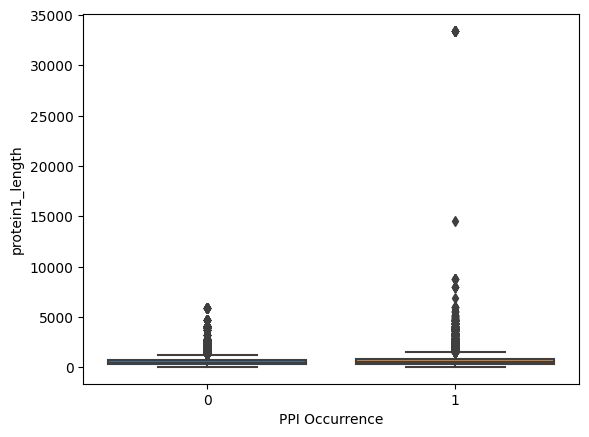

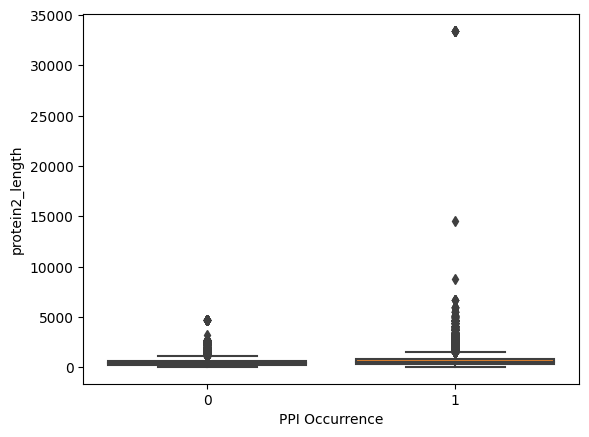

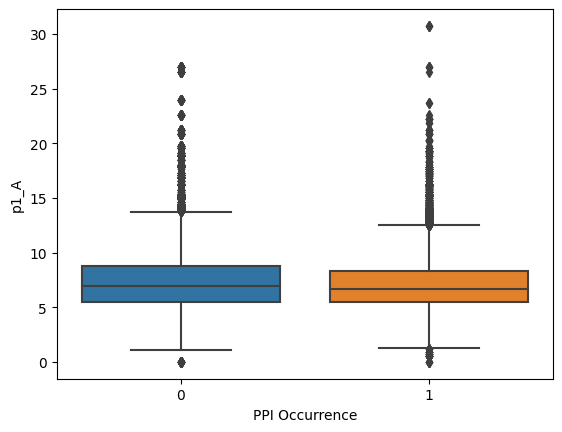

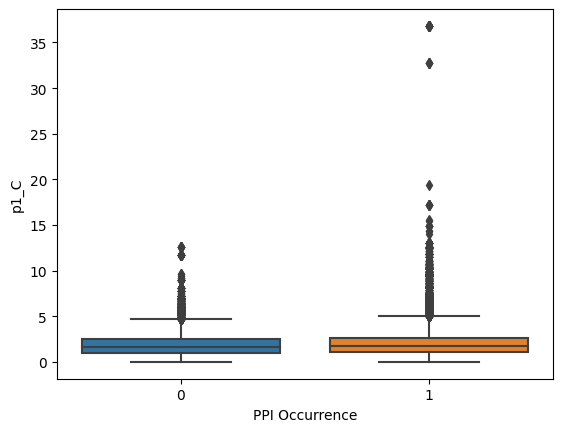

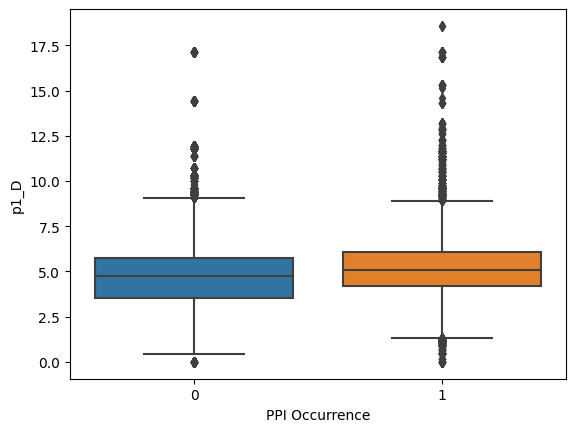

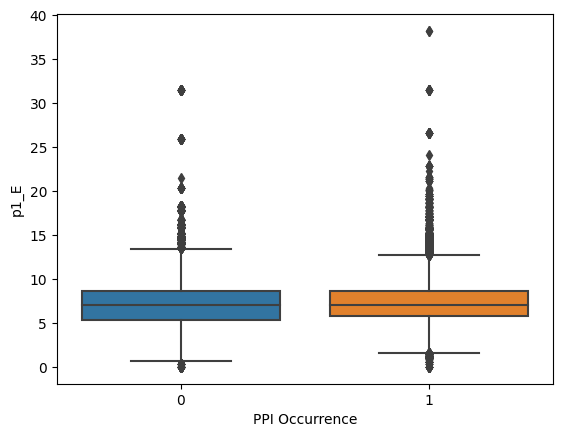

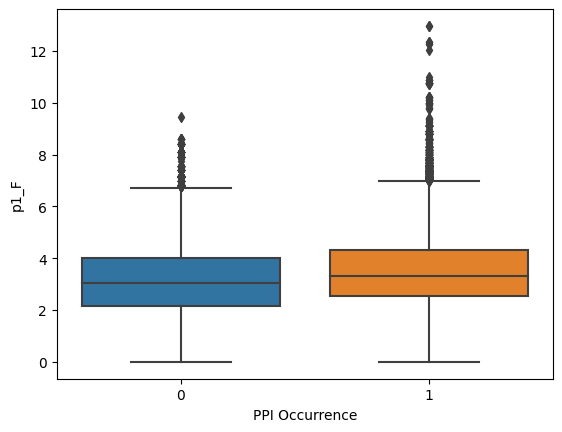

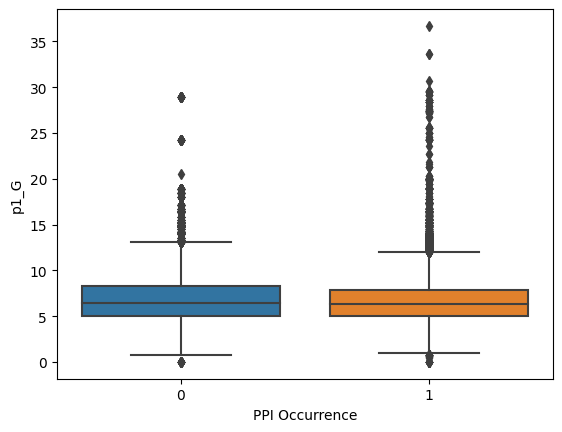

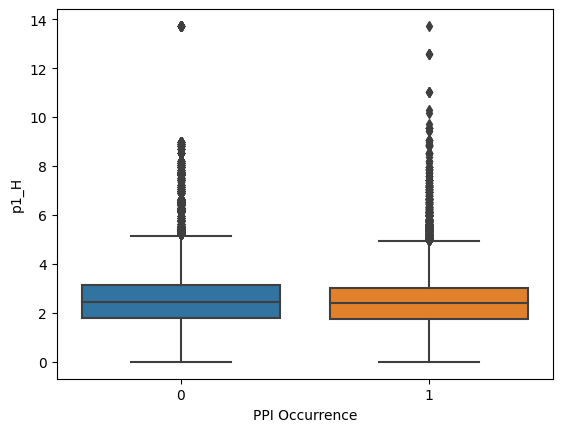

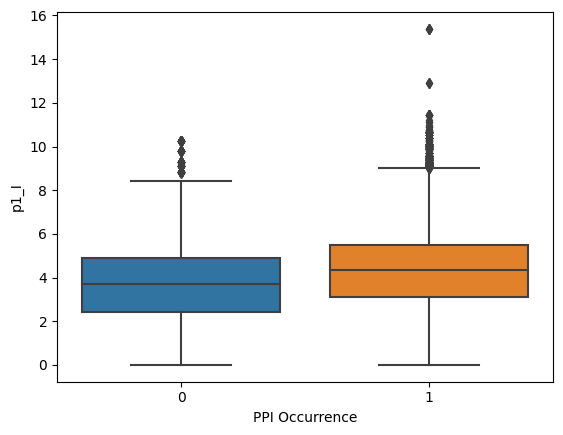

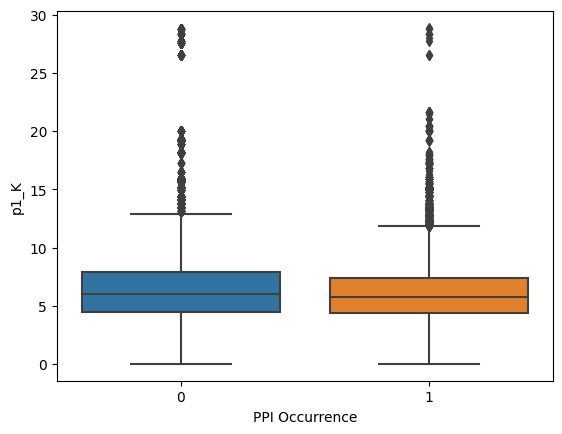

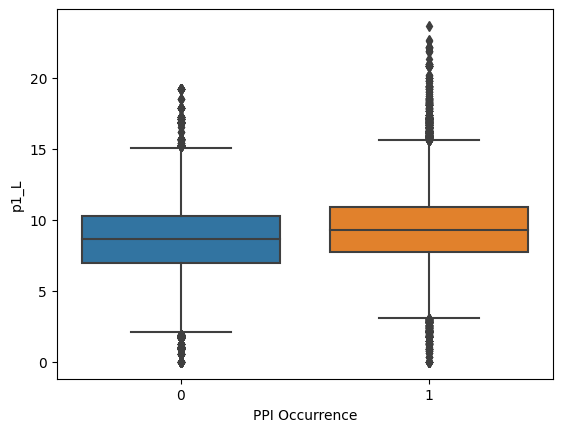

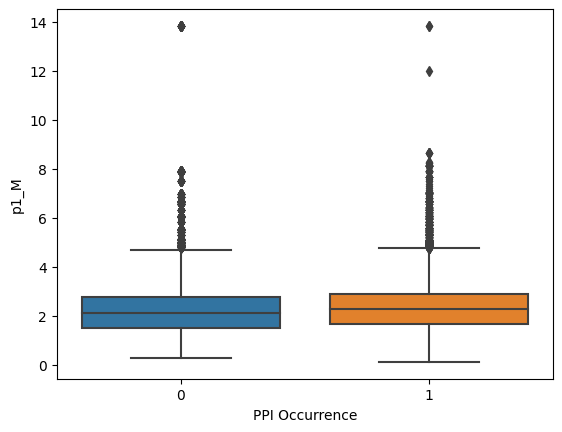

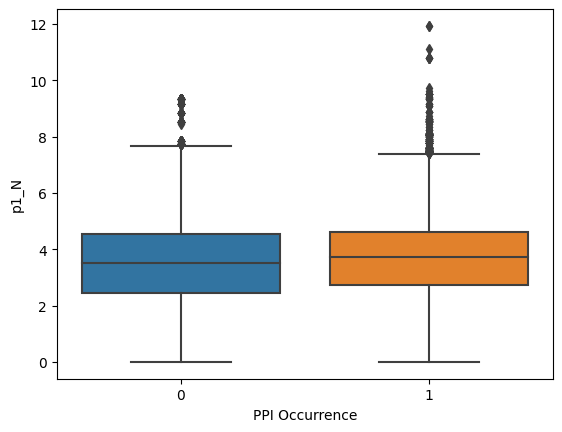

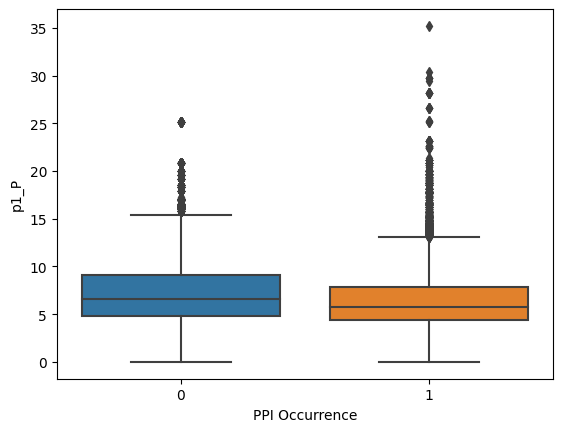

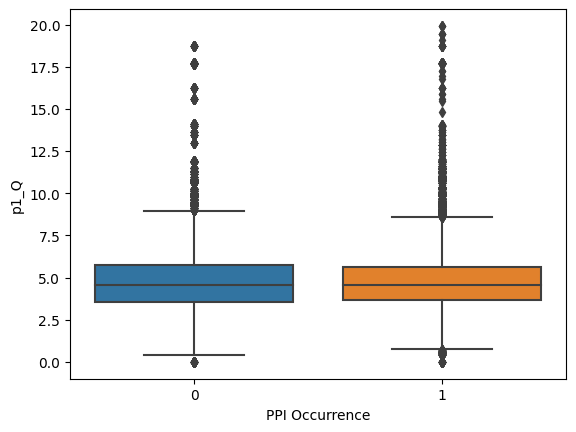

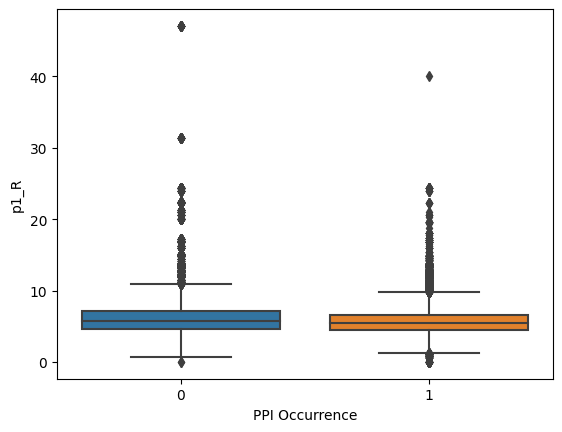

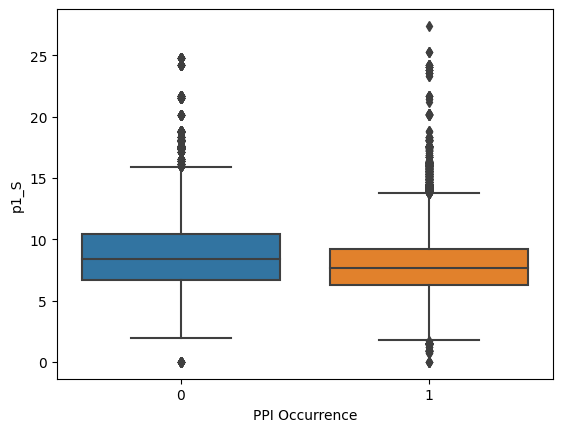

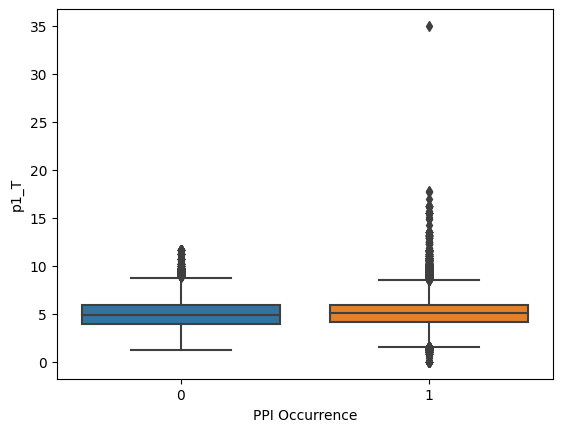

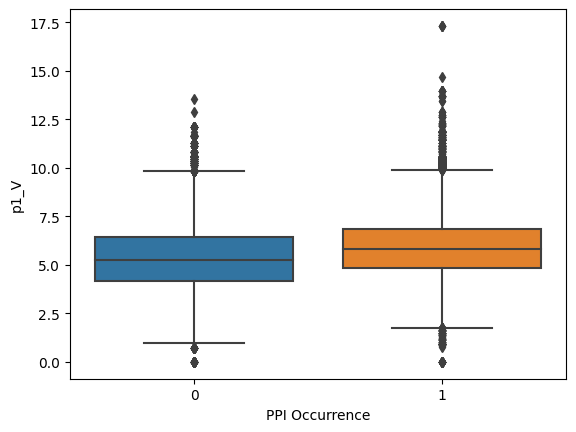

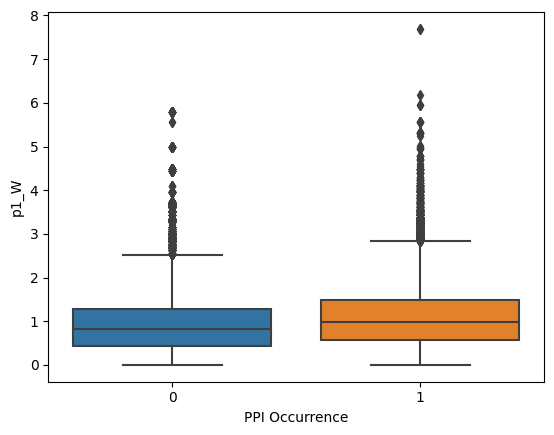

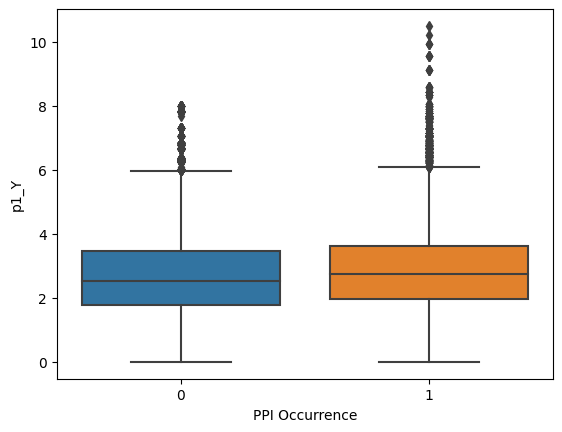

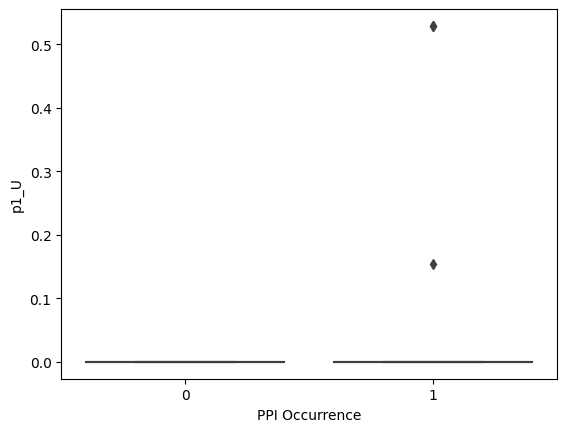

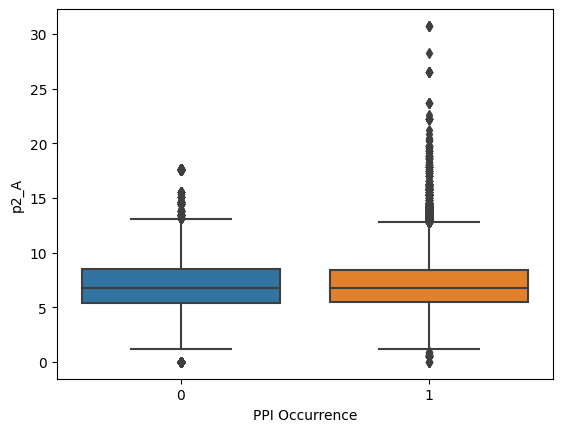

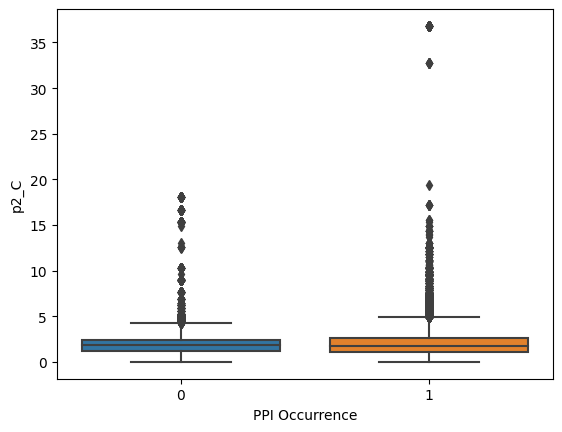

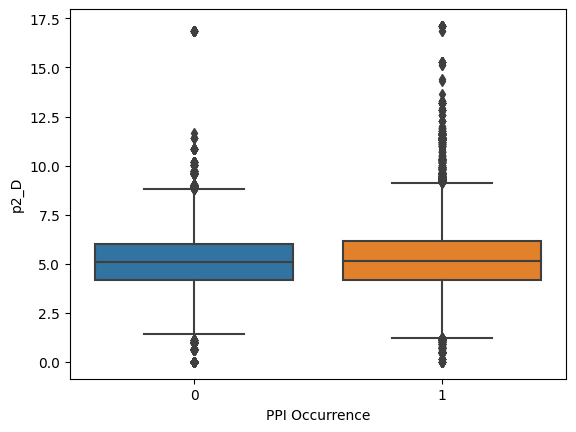

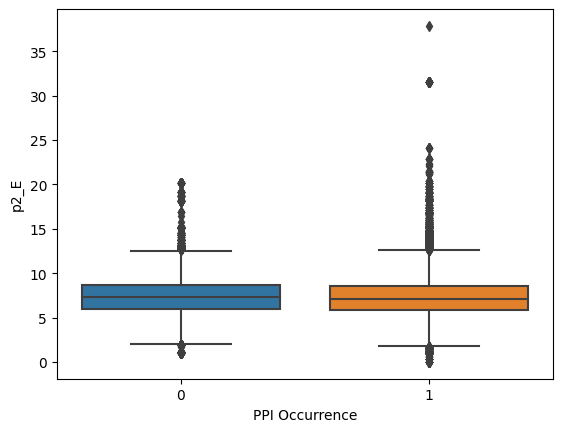

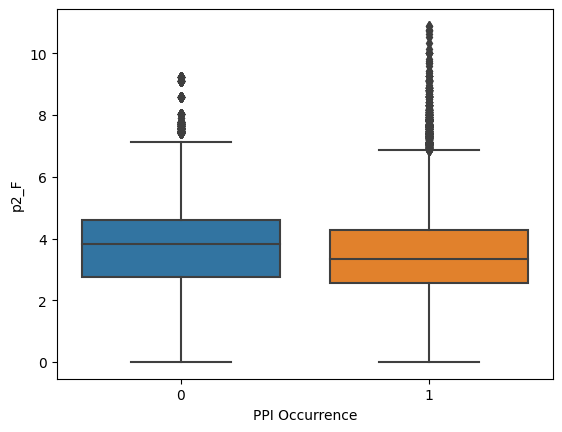

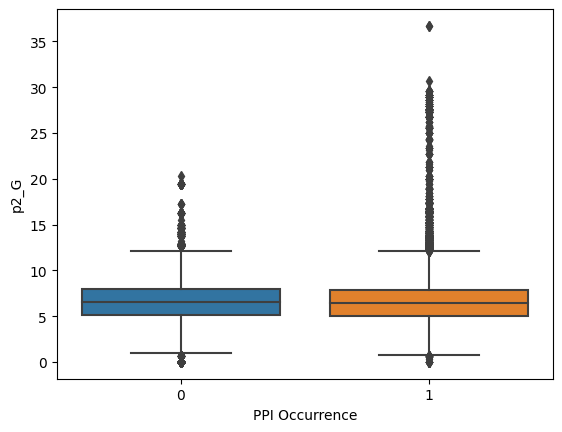

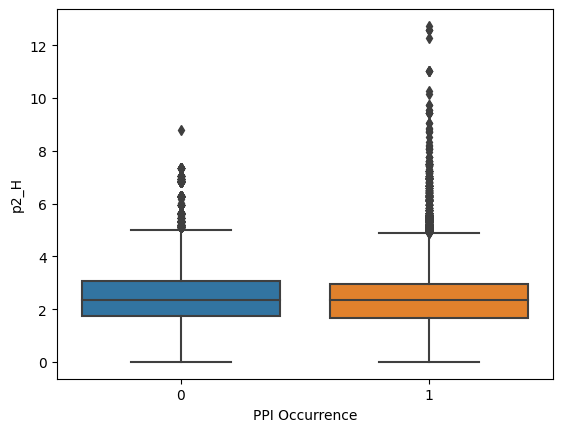

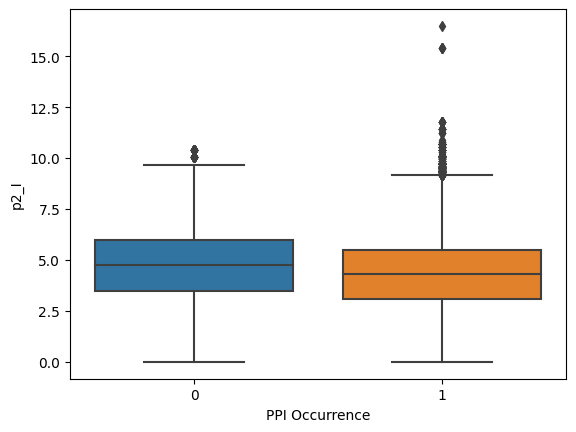

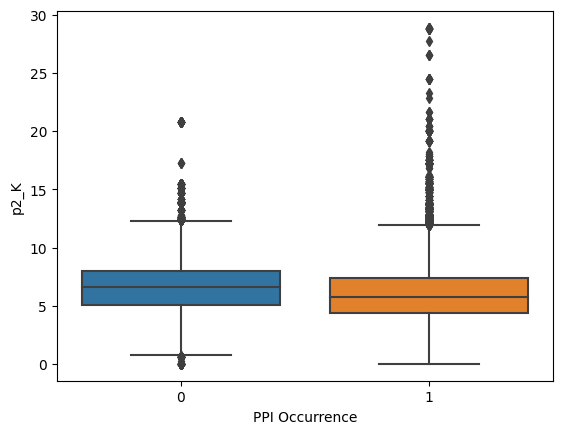

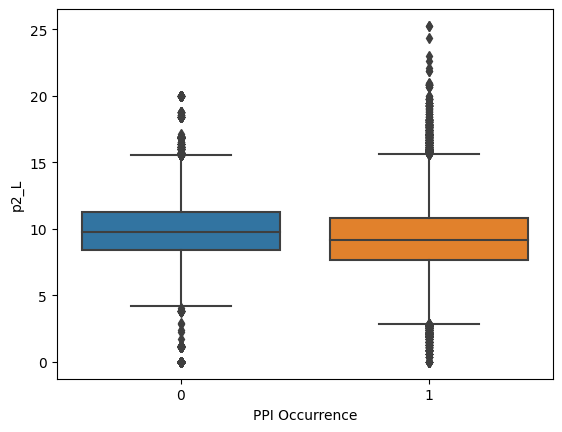

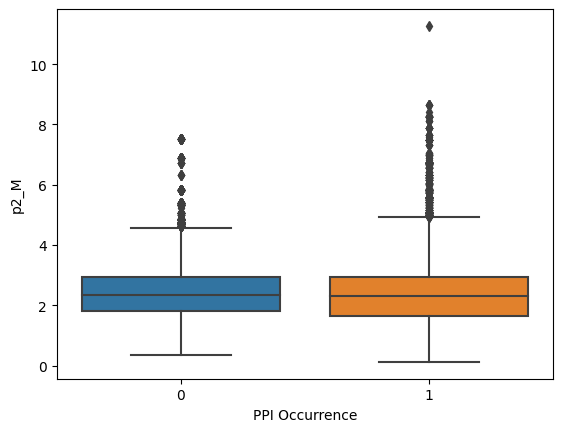

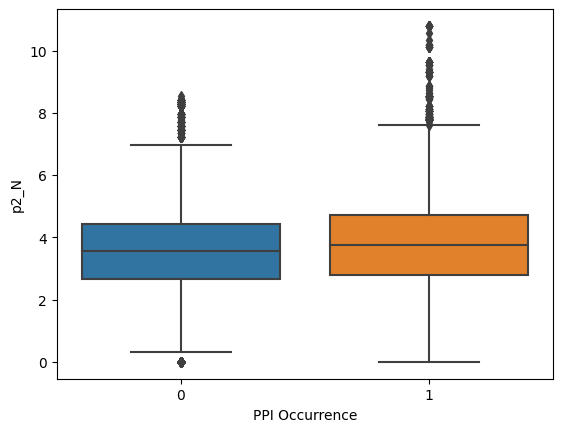

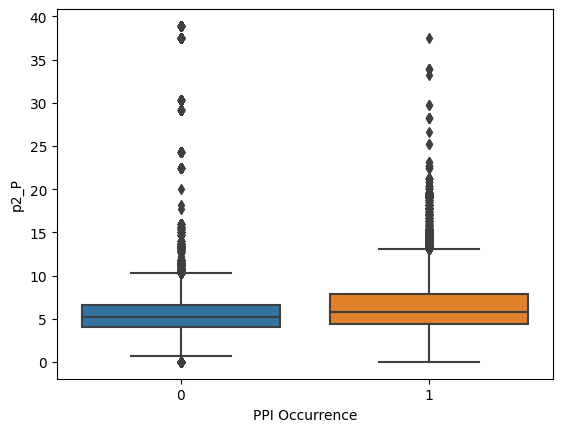

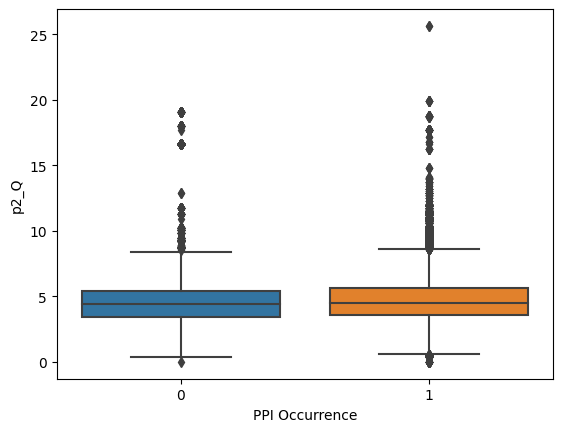

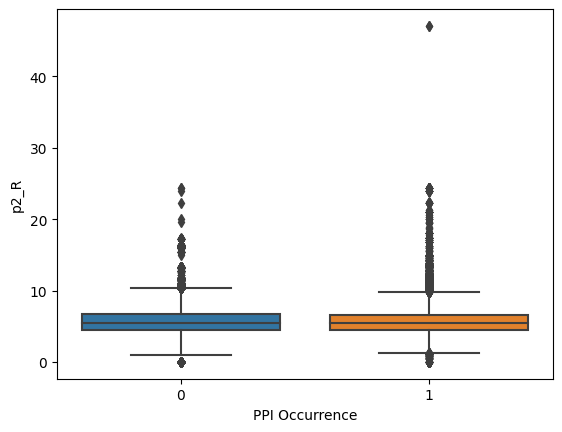

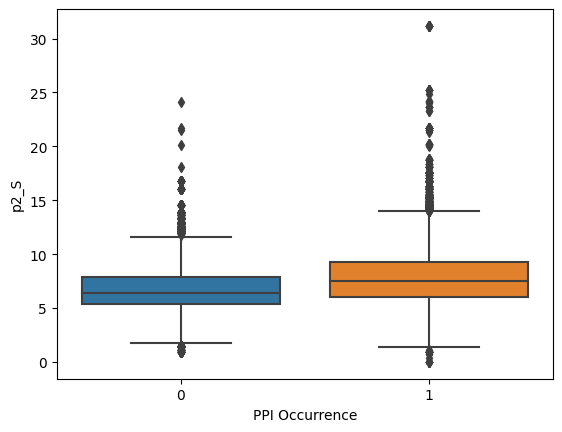

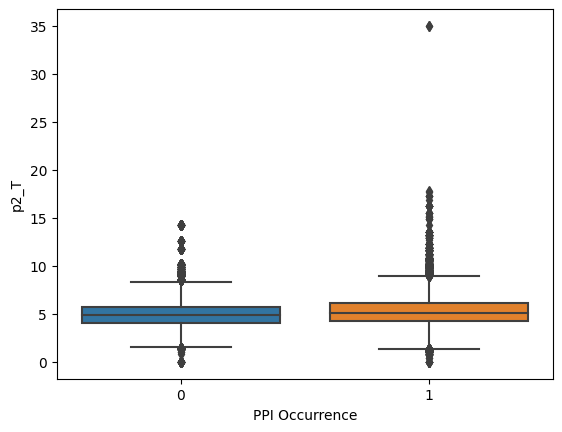

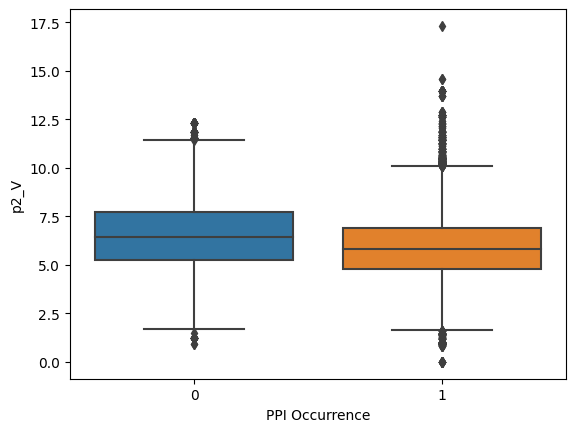

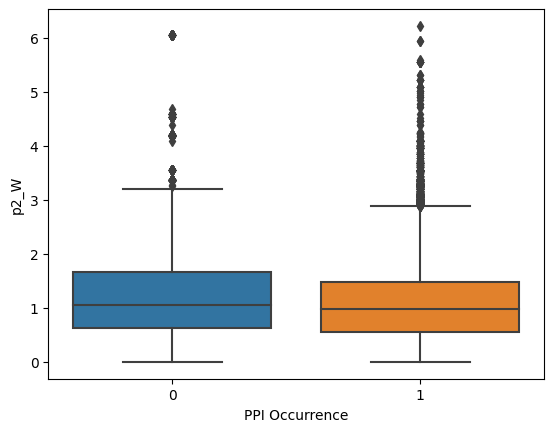

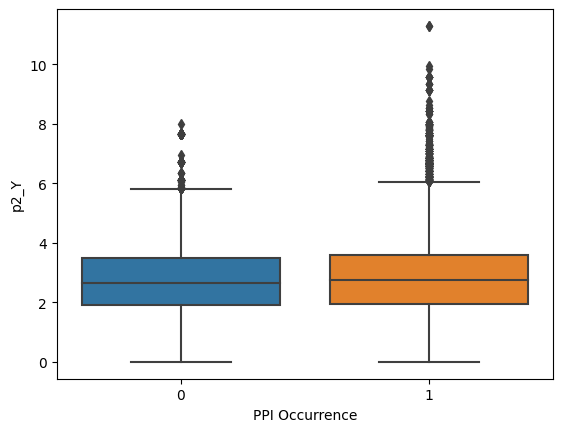

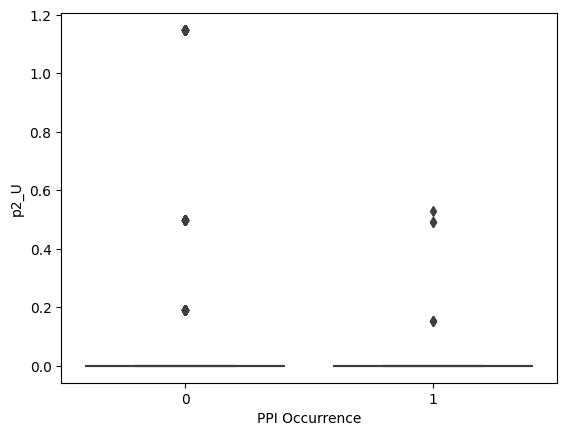

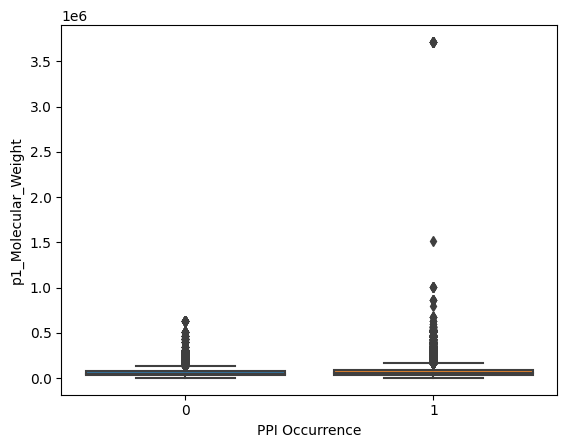

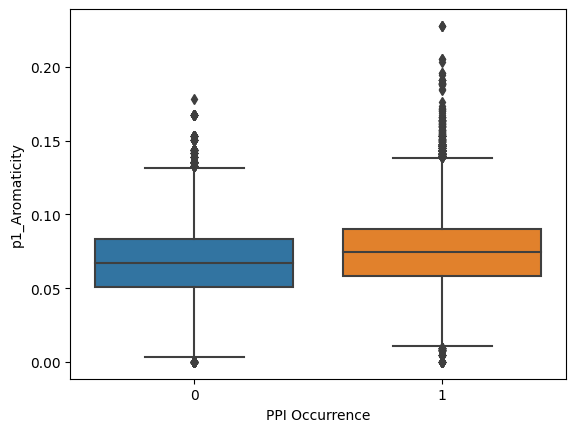

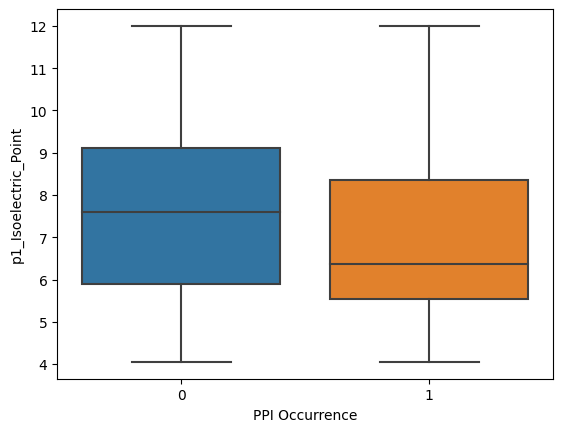

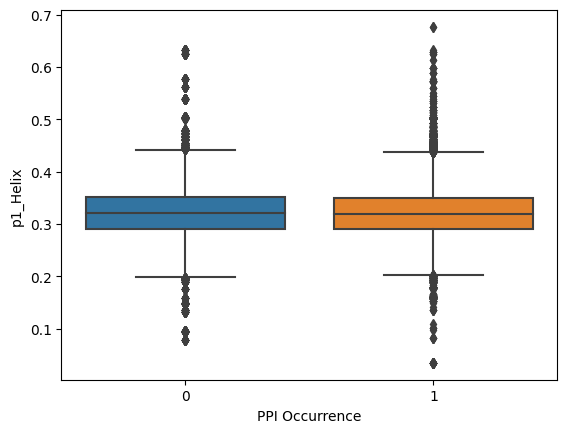

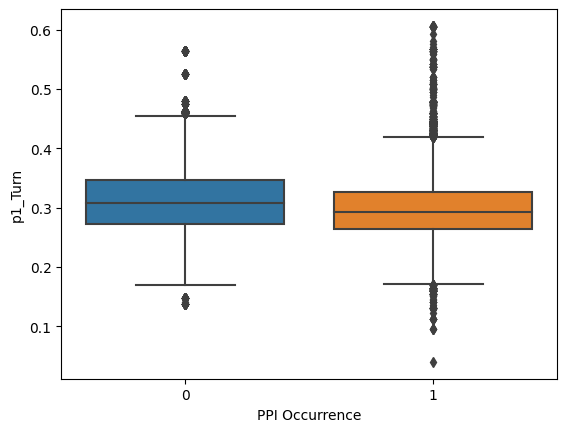

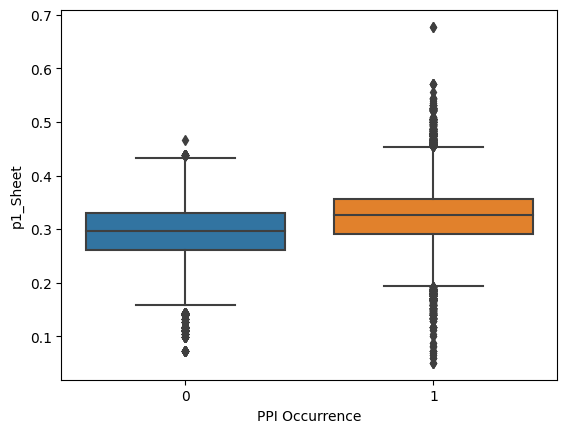

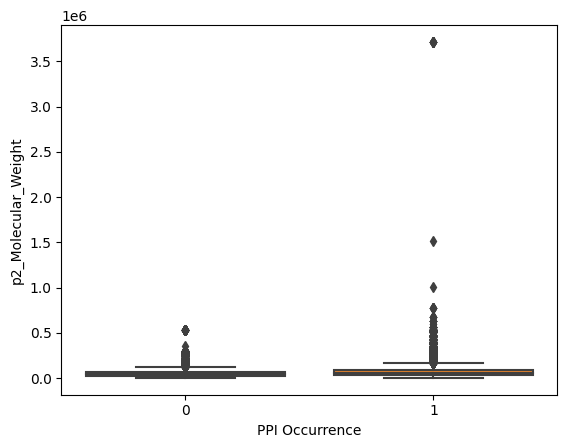

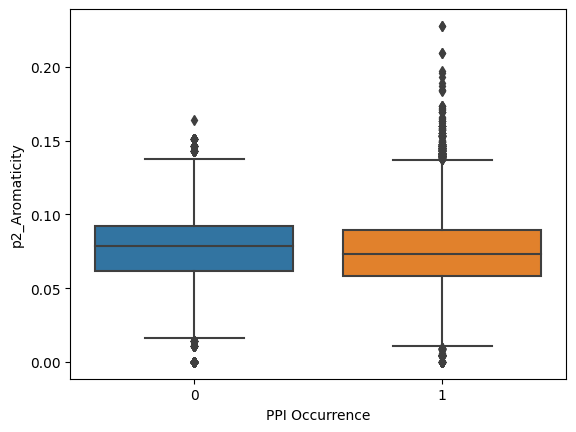

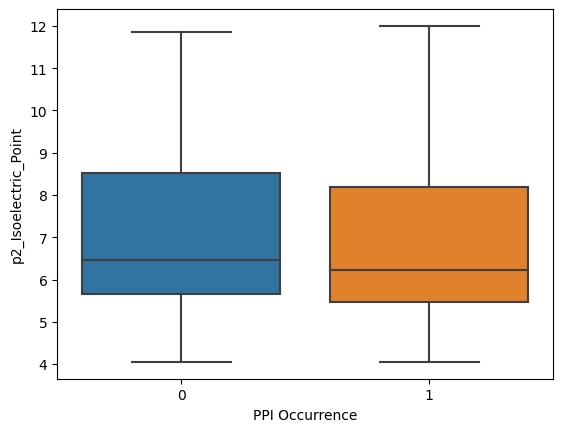

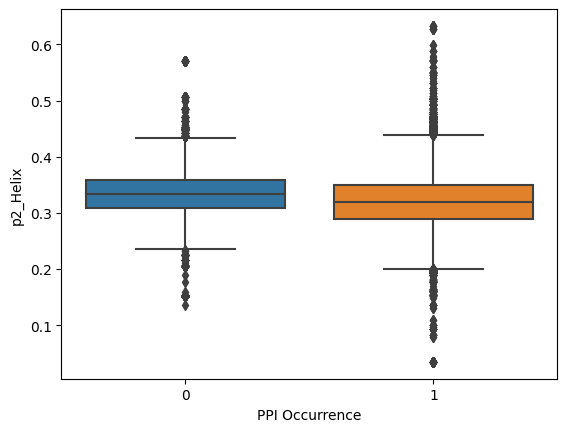

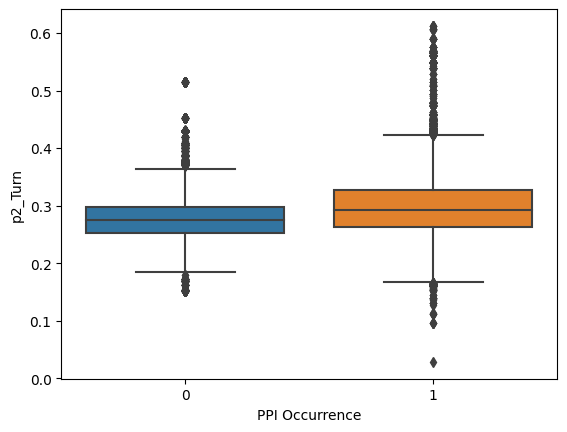

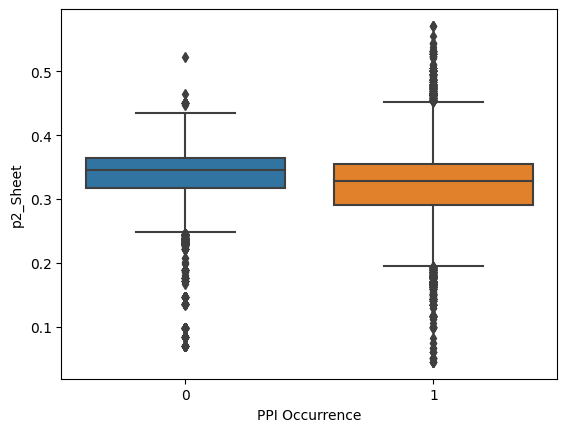

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in cols:
    # Create a box plot
    sns.boxplot(x='PPI', y=col, data=df)
    # Set title and labels
#     plt.title('Comparison of Feature Between PPI Groups')
    plt.xlabel('PPI Occurrence')
    plt.ylabel(col)
    # Show the plot
    plt.show()


In [25]:
# Calculate the correlation matrix
corr_matrix = df[cols].corr()

corr_matrix

,protein1_length,protein2_length,p1_A,p1_C,p1_D,p1_E,p1_F,p1_G,p1_H,p1_I,...,p1_Isoelectric_Point,p1_Helix,p1_Turn,p1_Sheet,p2_Molecular_Weight,p2_Aromaticity,p2_Isoelectric_Point,p2_Helix,p2_Turn,p2_Sheet
protein1_length,1.000000,0.060246,-0.090537,-0.004287,0.034822,0.029920,-0.044019,-0.052016,0.013649,0.010559,...,-0.122748,-0.064040,0.081767,-0.003173,0.060028,-0.014057,-0.023003,-0.009478,0.022374,-0.024242
protein2_length,0.060246,1.000000,-0.013024,0.021024,0.024384,0.007329,0.004864,-0.004208,-0.004830,0.020619,...,-0.040610,-0.009927,-0.010517,0.025947,0.999387,-0.102971,-0.138276,-0.084457,0.138221,-0.054287
p1_A,-0.090537,-0.013024,1.000000,-0.169711,-0.335568,-0.175226,-0.291879,0.257689,-0.153083,-0.341921,...,0.179666,0.374700,0.038842,-0.293284,-0.013015,0.002446,0.000434,0.023169,-0.023653,0.016558
p1_C,-0.004287,0.021024,-0.169711,1.000000,-0.060163,-0.138923,0.147290,-0.054803,0.203577,-0.019838,...,-0.048752,-0.244741,-0.128758,0.077865,0.019554,-0.002112,0.018158,-0.055458,0.026564,-0.012413
p1_D,0.034822,0.024384,-0.335568,-0.060163,1.000000,0.334458,0.143019,-0.202353,-0.136152,0.246244,...,-0.505539,0.033167,-0.019854,0.109827,0.024681,-0.010885,-0.009896,-0.002816,0.018355,-0.017464
p1_E,0.029920,0.007329,-0.175226,-0.138923,0.334458,1.000000,-0.096436,-0.319709,-0.143251,0.014764,...,-0.464155,0.583628,-0.353068,-0.164086,0.008471,-0.035268,-0.001886,0.042596,-0.024188,-0.022175
p1_F,-0.044019,0.004864,-0.291879,0.147290,0.143019,-0.096436,1.000000,-0.118652,0.051762,0.289178,...,-0.133547,-0.161741,-0.217899,0.539103,0.004918,0.034235,-0.009916,-0.015585,-0.000071,0.031455
p1_G,-0.052016,-0.004208,0.257689,-0.054803,-0.202353,-0.319709,-0.118652,1.000000,0.002624,-0.326269,...,0.188512,-0.318501,0.568446,-0.342057,-0.005292,0.012411,0.010944,-0.028677,0.024994,-0.006127
p1_H,0.013649,-0.004830,-0.153083,0.203577,-0.136152,-0.143251,0.051762,0.002624,1.000000,-0.092879,...,0.121335,-0.254002,0.004853,-0.081345,-0.005131,-0.006867,0.009595,-0.005405,-0.000233,-0.010386
p1_I,0.010559,0.020619,-0.341921,-0.019838,0.246244,0.014764,0.289178,-0.326269,-0.092879,1.000000,...,-0.192786,0.017602,-0.439611,0.642434,0.020985,0.006400,-0.018605,-0.006876,0.003748,0.019246


# Testing different Models:

## Splitting the dataset

In [26]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Assuming 'X' contains your feature matrix and 'y' contains the target labels
X = df[cols].values
y = df['PPI'].values

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.6, random_state=42)

## Random forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the random forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Validate the model
y_val_pred_rf = rf_model.predict(X_val)
val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print(f"Validation Accuracy (Random Forest): {val_accuracy_rf:.2f}")

# Test the model
y_test_pred_rf = rf_model.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print(f"Test Accuracy (Random Forest): {test_accuracy_rf:.2f}")


Validation Accuracy (Random Forest): 0.98
Test Accuracy (Random Forest): 0.97


In [28]:
from sklearn.metrics import confusion_matrix
y_pred2 = rf_model.predict(X) 
# Assuming 'y_pred' contains predicted labels and 'y_actual' contains actual labels
cm2 = confusion_matrix(y, y_pred2)

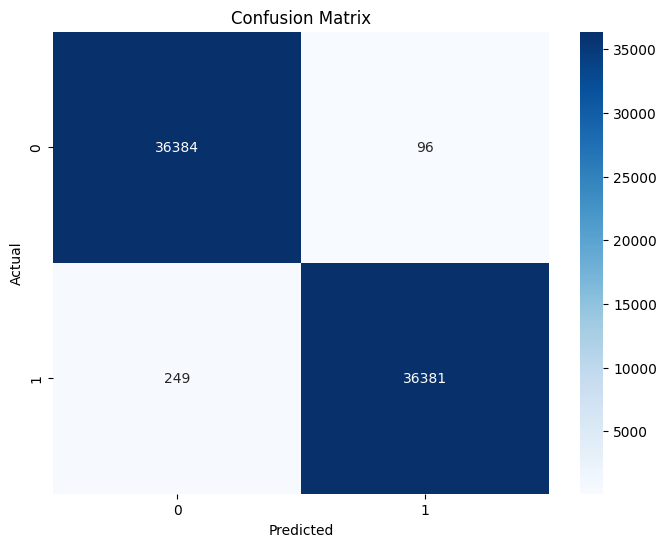

In [29]:
# plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

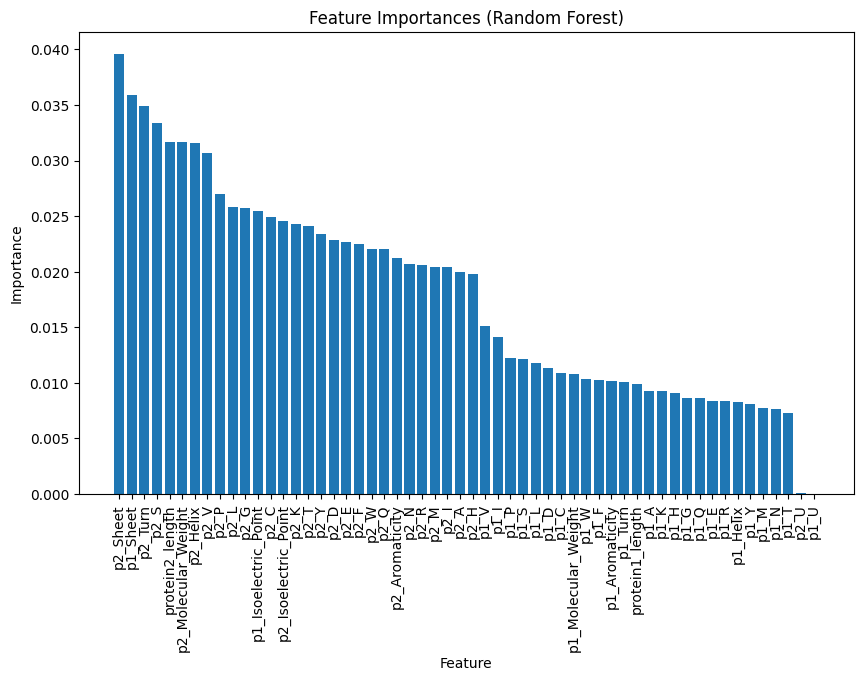

In [30]:
# Assuming 'rf_model' is your trained Random Forest model
importances = rf_model.feature_importances_

# Create a pandas DataFrame with feature names and importances
feature_importance_df = pd.DataFrame({'Feature': cols, 'rf': importances})

# Sort by importance (descending order)
feature_importance_df = feature_importance_df.sort_values(by='rf', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['rf'])
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()


In [31]:
feature_importance_df

,Feature,rf
55,p2_Sheet,0.039593
49,p1_Sheet,0.035911
54,p2_Turn,0.034948
38,p2_S,0.033369
1,protein2_length,0.031684
50,p2_Molecular_Weight,0.031657
53,p2_Helix,0.031557
40,p2_V,0.030669
35,p2_P,0.026995
32,p2_L,0.025867


# XGBoost

In [32]:
import xgboost as xgb

# Assuming you have your feature vectors X_train, X_val, and X_test
# and corresponding labels y_train, y_val, and y_test

# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=500, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Validate the model
y_val_pred_xgb = xgb_model.predict(X_val)
val_accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
print(f"Validation Accuracy (XGBoost): {val_accuracy_xgb:.4f}")

# Test the model
y_test_pred_xgb = xgb_model.predict(X_test)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)
print(f"Test Accuracy (XGBoost): {test_accuracy_xgb:.4f}")


Validation Accuracy (XGBoost): 0.9873
Test Accuracy (XGBoost): 0.9847


In [33]:
y_pred3 = xgb_model.predict(X)
cm3 = confusion_matrix(y, y_pred3)

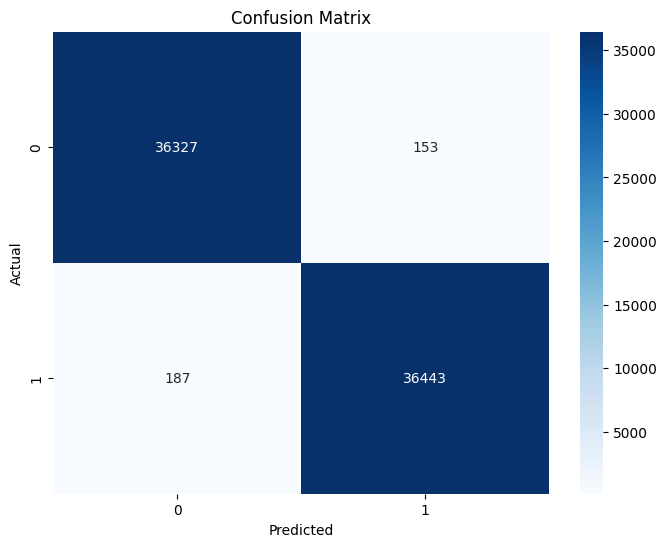

In [34]:
# plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues', xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

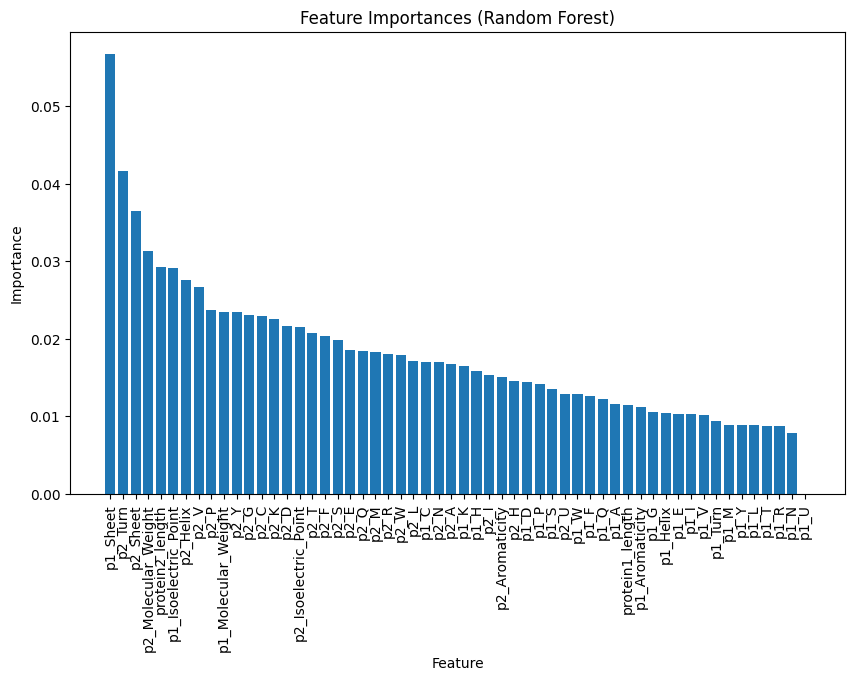

In [35]:
# Get feature importances
feature_importance = xgb_model.feature_importances_


# Create a pandas DataFrame with feature names and importances
feature_importance_df2 = pd.DataFrame({'Feature': cols, 'xgb': feature_importance})

# Sort by importance (descending order)
feature_importance_df2 = feature_importance_df2.sort_values(by='xgb', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df2['Feature'], feature_importance_df2['xgb'])
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

In [36]:
feature_importance_df2

,Feature,xgb
49,p1_Sheet,0.056767
54,p2_Turn,0.041685
55,p2_Sheet,0.036546
50,p2_Molecular_Weight,0.031366
1,protein2_length,0.029264
46,p1_Isoelectric_Point,0.029173
53,p2_Helix,0.027544
40,p2_V,0.026721
35,p2_P,0.023706
44,p1_Molecular_Weight,0.023526


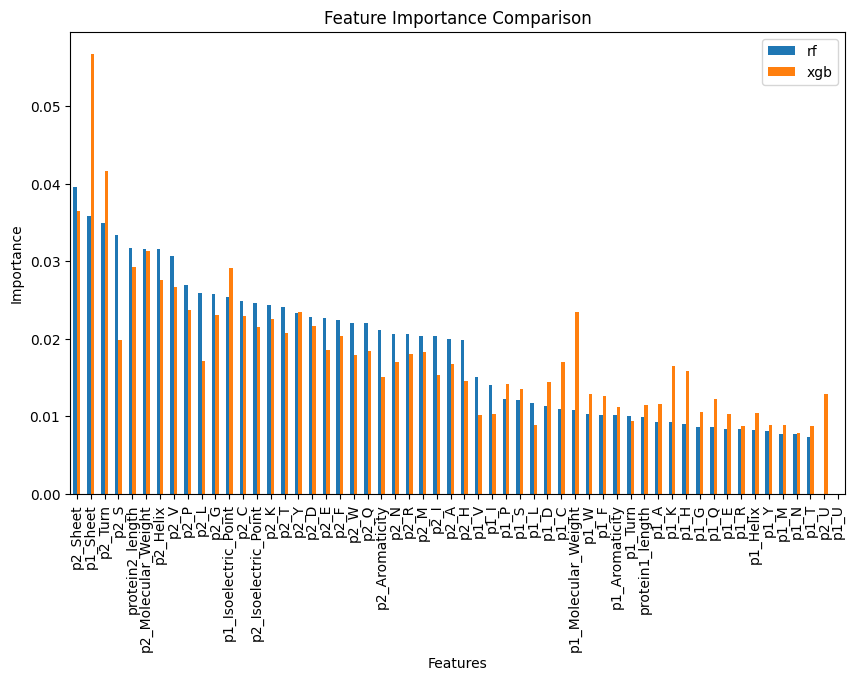

Correlation between model importances: 0.8357080558882855
Spearman rank correlation between model importances: 0.8829801777170199
Kendall tau rank correlation between model importances: 0.7376623376623378


In [37]:
from scipy.stats import spearmanr, kendalltau
# Merging dataframes
merged_df = pd.merge(feature_importance_df, feature_importance_df2, on='Feature')

# Plotting
def plot_feature_importance(merged_df):
    merged_df = merged_df.set_index('Feature')
    merged_df.plot(kind='bar', figsize=(10, 6))
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.title('Feature Importance Comparison')
    plt.show()

plot_feature_importance(merged_df)

# Correlation
correlation = merged_df[['xgb', 'rf']].corr().iloc[0, 1]
print(f'Correlation between model importances: {correlation}')

# Rank Correlation
rank_correlation, _ = spearmanr(merged_df['xgb'], merged_df['rf'])
print(f'Spearman rank correlation between model importances: {rank_correlation}')

# Kendall Tau
kendall_tau, _ = kendalltau(merged_df['xgb'], merged_df['rf'])
print(f'Kendall tau rank correlation between model importances: {kendall_tau}')

In [38]:
# Absolute Difference
merged_df['absolute_difference'] = abs(merged_df['xgb'] - merged_df['rf'])
merged_df

,Feature,rf,xgb,absolute_difference
0,p2_Sheet,0.039593,0.036546,0.003047
1,p1_Sheet,0.035911,0.056767,0.020855
2,p2_Turn,0.034948,0.041685,0.006737
3,p2_S,0.033369,0.019893,0.013476
4,protein2_length,0.031684,0.029264,0.002420
5,p2_Molecular_Weight,0.031657,0.031366,0.000291
6,p2_Helix,0.031557,0.027544,0.004013
7,p2_V,0.030669,0.026721,0.003947
8,p2_P,0.026995,0.023706,0.003289
9,p2_L,0.025867,0.017124,0.008743
